dataset: https://www.kaggle.com/saurabhshahane/patient-treatment-classification?select=data-ori.csv

blog post:

github: 

In [263]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **EXPLORATORY DATA ANALYSIS**


In [264]:
# load dataset into dataframe

df_health = pd.read_csv('health.csv')
df_health.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3          310  25.4  33.6   
1         43.5          14.8         5.39       12.7          334  27.5  34.0   
2         33.5          11.3         4.74       13.2          305  23.8  33.7   
3         39.1          13.7         4.98       10.5          366  27.5  35.0   
4         30.9           9.9         4.23       22.1          333  23.4  32.0   

    MCV  AGE SEX SOURCE  
0  75.5    1   F    out  
1  80.7    1   F    out  
2  70.7    1   F    out  
3  78.5    1   F    out  
4  73.0    1   M    out

In [265]:
df_health.shape

(4412, 11)

In [266]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [267]:
# check for null values

df_health.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [268]:
# check for duplicates

duplicate = df_health[df_health.duplicated()]
print(duplicate.shape)

(0, 11)


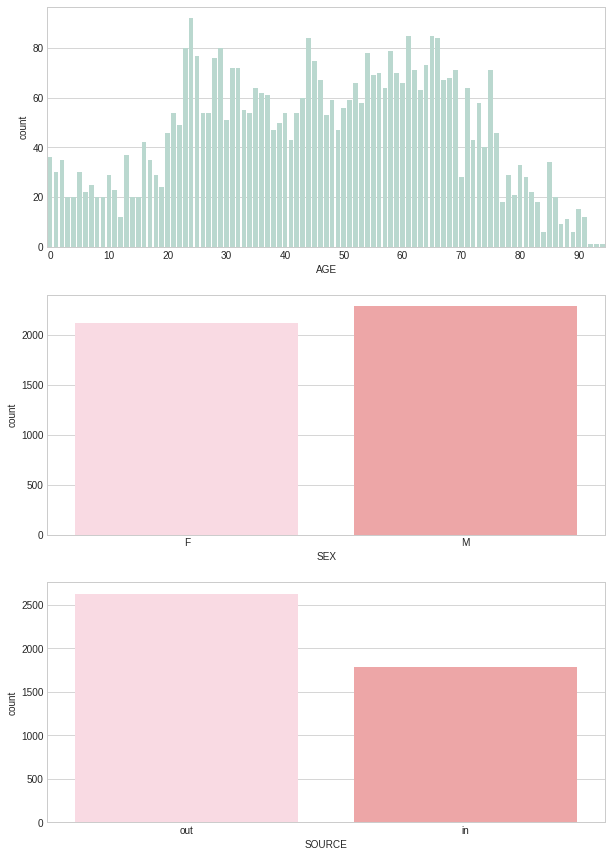

In [269]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(10)

plt.style.use('seaborn-whitegrid')
colors = ['#FED5E1', '#F99A9C', '#B5DDD1']

# subplot 1: AGE
fig.add_subplot(3, 1, 1)
ax1 = sns.countplot(x = 'AGE', data = df_health, color = '#B5DDD1')
x1 = ax1.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
x1 = ax1.set_xticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

# subplot 2: SEX
fig.add_subplot(3, 1, 2)
ax2 = sns.countplot(x = 'SEX', data = df_health, palette = colors)

# subplot 3: SOURCE (target variable)
fig.add_subplot(3, 1, 3)
ax3 = sns.countplot(x = 'SOURCE', data = df_health, palette = colors)

plt.show()

In [40]:
print(df_health['SOURCE'].value_counts())

out    2628
in     1784
Name: SOURCE, dtype: int64


### **DATA PREPARATION**

CONVERTING CATEGORICAL VARIABLES

In [159]:
# convert categorical variables to numerical

df_health["SEX"] = df_health["SEX"].astype('category').cat.codes
df_health["SOURCE"] = df_health["SOURCE"].astype('category').cat.codes

# SEX -- 0: female, 1: male
# SOURCE -- 0: inpatient, 1: outpatient

df_health.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3          310  25.4  33.6   
1         43.5          14.8         5.39       12.7          334  27.5  34.0   
2         33.5          11.3         4.74       13.2          305  23.8  33.7   
3         39.1          13.7         4.98       10.5          366  27.5  35.0   
4         30.9           9.9         4.23       22.1          333  23.4  32.0   

    MCV  AGE  SEX  SOURCE  
0  75.5    1    0       1  
1  80.7    1    0       1  
2  70.7    1    0       1  
3  78.5    1    0       1  
4  73.0    1    1       1

MEASURING CORRELATION

In [193]:
# correlation matrix
df_health.corr()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
HAEMATOCRIT      1.000000      0.973267     0.864989  -0.217218    -0.003562   
HAEMOGLOBINS     0.973267      1.000000     0.818013  -0.208583    -0.045441   
ERYTHROCYTE      0.864989      0.818013     1.000000  -0.186711     0.025879   
LEUCOCYTE       -0.217218     -0.208583    -0.186711   1.000000     0.283262   
THROMBOCYTE     -0.003562     -0.045441     0.025879   0.283262     1.000000   
MCH              0.083714      0.203248    -0.383666  -0.014840    -0.138058   
MCHC             0.108098      0.314159    -0.048313   0.003194    -0.198921   
MCV              0.054948      0.105379    -0.436041  -0.015885    -0.075961   
AGE             -0.254799     -0.239480    -0.412858   0.191987     0.031064   
SEX              0.274364      0.308010     0.246158   0.050660    -0.081131   
SOURCE           0.271190      0.255793     0.232001  -0.137359     0.243202   

                   MCH      MCHC       MCV       AGE       SEX    SOURCE  
HAEMATOCRIT   0.083714  0.108098  0.054948 -0.254799  0.274364  0.271190  
HAEMOGLOBINS  0.203248  0.314159  0.105379 -0.239480  0.308010  0.255793  
ERYTHROCYTE  -0.383666 -0.048313 -0.436041 -0.412858  0.246158  0.232001  
LEUCOCYTE    -0.014840  0.003194 -0.015885  0.191987  0.050660 -0.137359  
THROMBOCYTE  -0.138058 -0.198921 -0.075961  0.031064 -0.081131  0.243202  
MCH           1.000000  0.589830  0.931804  0.350166  0.077855  0.013308  
MCHC          0.589830  1.000000  0.259672  0.041741  0.203915 -0.017711  
MCV           0.931804  0.259672  1.000000  0.395380  0.000262  0.022524  
AGE           0.350166  0.041741  0.395380  1.000000  0.026647 -0.109533  
SEX           0.077855  0.203915  0.000262  0.026647  1.000000 -0.051795  
SOURCE        0.013308 -0.017711  0.022524 -0.109533 -0.051795  1.000000

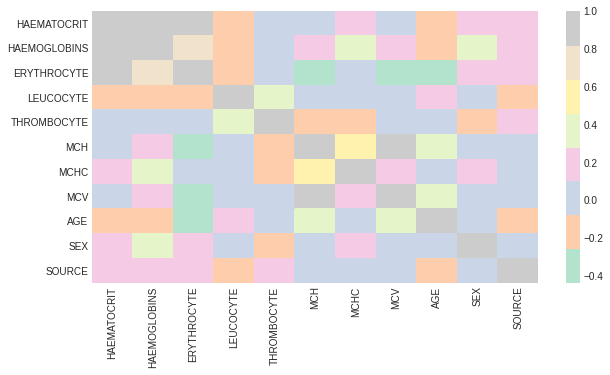

In [189]:
# heatmap
plt.figure(figsize = (10, 5))
plt.style.use('seaborn-whitegrid')
sns.heatmap(df_health.corr(), cmap = 'Pastel2')
plt.show()

In [192]:
df_health.corr()['SOURCE']

HAEMATOCRIT     0.271190
HAEMOGLOBINS    0.255793
ERYTHROCYTE     0.232001
LEUCOCYTE      -0.137359
THROMBOCYTE     0.243202
MCH             0.013308
MCHC           -0.017711
MCV             0.022524
AGE            -0.109533
SEX            -0.051795
SOURCE          1.000000
Name: SOURCE, dtype: float64

NORMALIZING THE DATA

In [161]:
df_health.describe()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE    LEUCOCYTE  THROMBOCYTE  \
count  4412.000000   4412.000000  4412.000000  4412.000000  4412.000000   
mean     38.197688     12.741727     4.541260     8.718608   257.524479   
std       5.974784      2.079903     0.784091     5.049041   113.972365   
min      13.700000      3.800000     1.480000     1.100000     8.000000   
25%      34.375000     11.400000     4.040000     5.675000   188.000000   
50%      38.600000     12.900000     4.570000     7.600000   256.000000   
75%      42.500000     14.200000     5.050000    10.300000   321.000000   
max      69.000000     18.900000     7.860000    76.600000  1183.000000   

               MCH         MCHC          MCV          AGE          SEX  \
count  4412.000000  4412.000000  4412.000000  4412.000000  4412.000000   
mean     28.234701    33.343042    84.612942    46.626473     0.519039   
std       2.672639     1.228664     6.859101    21.731218     0.499694   
min      14.900000    26.000000    54.000000     1.000000     0.000000   
25%      27.200000    32.700000    81.500000    29.000000     0.000000   
50%      28.700000    33.400000    85.400000    47.000000     1.000000   
75%      29.800000    34.100000    88.700000    64.000000     1.000000   
max      40.800000    39.000000   115.600000    99.000000     1.000000   

            SOURCE  
count  4412.000000  
mean      0.595648  
std       0.490822  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [212]:
plt.style.use('seaborn-whitegrid')
df_health.plot(colormap = 'Pastel2', legend = False)
plt.show()

In [195]:
# normalize and scale data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df_normalized = scaler.fit_transform(df_health)
columns = ['HAEMATOCRIT',	'HAEMOGLOBINS',	'ERYTHROCYTE',	'LEUCOCYTE',	'THROMBOCYTE',	'MCH',	'MCHC',	'MCV',	'AGE',	'SEX',	'SOURCE']
df_normalized = pd.DataFrame(df_normalized, columns = columns)
df_normalized.describe()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE    LEUCOCYTE  THROMBOCYTE  \
count  4412.000000   4412.000000  4412.000000  4412.000000  4412.000000   
mean      0.442996      0.592167     0.479821     0.100909     0.212361   
std       0.108043      0.137742     0.122898     0.066875     0.096998   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.373870      0.503311     0.401254     0.060596     0.153191   
50%       0.450271      0.602649     0.484326     0.086093     0.211064   
75%       0.520796      0.688742     0.559561     0.121854     0.266383   
max       1.000000      1.000000     1.000000     1.000000     1.000000   

               MCH         MCHC          MCV          AGE          SEX  \
count  4412.000000  4412.000000  4412.000000  4412.000000  4412.000000   
mean      0.514853     0.564849     0.496963     0.465576     0.519039   
std       0.103191     0.094513     0.111349     0.221747     0.499694   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.474903     0.515385     0.446429     0.285714     0.000000   
50%       0.532819     0.569231     0.509740     0.469388     1.000000   
75%       0.575290     0.623077     0.563312     0.642857     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            SOURCE  
count  4412.000000  
mean      0.595648  
std       0.490822  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [53]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   float64
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   float64
 9   SEX           4412 non-null   float64
 10  SOURCE        4412 non-null   float64
dtypes: float64(11)
memory usage: 379.3 KB


In [73]:
# identify target and feature variables
X = df_normalized.iloc[:, :-1]
y = df_normalized.iloc[:, -1]

# split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

print(X_train.shape)
print(X_test.shape)

(3088, 10)
(1324, 10)


In [74]:
# baseline accuracy

from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy = 'most_frequent')
dummy_classifier.fit(X_train, y_train)
baseline_accuracy = dummy_classifier.score(X_test, y_test)

print('baseline accuracy:', baseline_accuracy)

baseline accuracy: 0.5959214501510574


### **MODELING**

logistic regression accuracy: 0.7122356495468278
cross validation score: 0.6947225043863698

confusion matrix:
[[263 272]
 [109 680]]


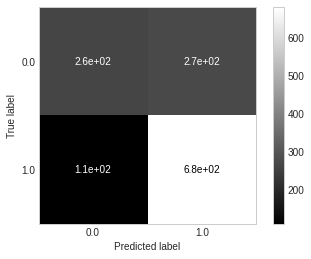


classification report:
              precision    recall  f1-score   support

         0.0       0.71      0.49      0.58       535
         1.0       0.71      0.86      0.78       789

    accuracy                           0.71      1324
   macro avg       0.71      0.68      0.68      1324
weighted avg       0.71      0.71      0.70      1324



In [233]:
# logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# instantiate and fit model
logistic_regression = LogisticRegression(random_state = 42)
logistic_regression.fit(X_train, y_train)

# make predictions
lr_predictions = logistic_regression.predict(X_test)

# evaluate model
lr_accuracy = metrics.accuracy_score(y_test, lr_predictions)
print('logistic regression accuracy:', lr_accuracy)

lr_cvs = cross_val_score(logistic_regression, X, y, cv = 10)
print('cross validation score:', lr_cvs.mean())

# confusion matrix
lr_cnf_matrix = metrics.confusion_matrix(y_test, lr_predictions)
print('\nconfusion matrix:')
print(lr_cnf_matrix)

metrics.plot_confusion_matrix(logistic_regression, X_test, y_test, cmap = 'gray')
plt.grid(False)
plt.show()

# classification report
print('\nclassification report:')
print(metrics.classification_report(y_test, lr_predictions))

decision tree accuracy: 0.7137462235649547
cross validation score: 0.7012446004042643

confusion matrix:
[[287 248]
 [131 658]]


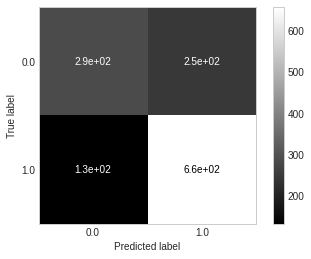


classification report:
              precision    recall  f1-score   support

         0.0       0.69      0.54      0.60       535
         1.0       0.73      0.83      0.78       789

    accuracy                           0.71      1324
   macro avg       0.71      0.69      0.69      1324
weighted avg       0.71      0.71      0.71      1324



In [235]:
# decision tree

from sklearn.tree import DecisionTreeClassifier

# instantiate and fit model
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 42)
decision_tree.fit(X_train, y_train)

# make predictions
dt_predictions = decision_tree.predict(X_test)

# evaluate model
dt_accuracy = metrics.accuracy_score(y_test, dt_predictions)
print('decision tree accuracy:', dt_accuracy)

dt_cvs = cross_val_score(decision_tree, X, y, cv = 10)
print('cross validation score:', dt_cvs.mean())

# confusion matrix
dt_cnf_matrix = metrics.confusion_matrix(y_test, dt_predictions)
print('\nconfusion matrix:')
print(dt_cnf_matrix)

metrics.plot_confusion_matrix(decision_tree, X_test, y_test, cmap = 'gray')
plt.grid(False)
plt.show()

# classification report
print('\nclassification report:')
print(metrics.classification_report(y_test, dt_predictions))

bagging model accuracy: 0.7273413897280967
cross validation score: 0.7078369809462247

confusion matrix:
[[287 248]
 [113 676]]


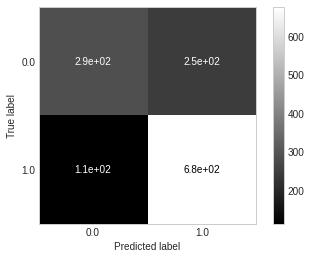


classification report:
              precision    recall  f1-score   support

         0.0       0.72      0.54      0.61       535
         1.0       0.73      0.86      0.79       789

    accuracy                           0.73      1324
   macro avg       0.72      0.70      0.70      1324
weighted avg       0.73      0.73      0.72      1324



In [250]:
# bagging

from sklearn.ensemble import BaggingClassifier

# instantiate and fit model
bagging_model = BaggingClassifier(base_estimator = decision_tree, n_estimators = 10, random_state = 42)
bagging_model.fit(X_train, y_train)

# make predictions
bagging_predictions = bagging_model.predict(X_test)

# evaluate model
bagging_accuracy = metrics.accuracy_score(y_test, bagging_predictions)
print('bagging model accuracy:', bagging_accuracy)

bagging_cvs = cross_val_score(bagging_model, X, y, cv = 10)
print('cross validation score:', bagging_cvs.mean())

# confusion matrix
bagging_cnf_matrix = metrics.confusion_matrix(y_test, bagging_predictions)
print('\nconfusion matrix:')
print(bagging_cnf_matrix)

metrics.plot_confusion_matrix(bagging_model, X_test, y_test, cmap = 'gray')
plt.grid(False)
plt.show()

# classification report
print('\nclassification report:')
print(metrics.classification_report(y_test, bagging_predictions))

random forest accuracy: 0.7439577039274925
cross validation score: 0.5359456603154082

confusion matrix:
[[334 201]
 [138 651]]


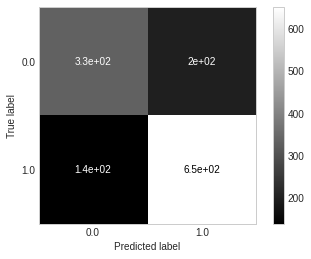


classification report:
              precision    recall  f1-score   support

         0.0       0.71      0.62      0.66       535
         1.0       0.76      0.83      0.79       789

    accuracy                           0.74      1324
   macro avg       0.74      0.72      0.73      1324
weighted avg       0.74      0.74      0.74      1324



In [237]:
# random forest

from sklearn.ensemble import RandomForestClassifier

# instantiate and fit model
random_forest = RandomForestClassifier(n_estimators = 100, max_features = 7, random_state = 42)
random_forest.fit(X_train, y_train)

# make predictions
rf_predictions = random_forest.predict(X_test)

# evaluate model
rf_accuracy = metrics.accuracy_score(y_test, rf_predictions)
print('random forest accuracy:', rf_accuracy)

rf_cvs = cross_val_score(random_forest, X, y, cv = 10)
print('cross validation score:', rf_cvs.mean())

# confusion matrix
rf_cnf_matrix = metrics.confusion_matrix(y_test, rf_predictions)
print('\nconfusion matrix:')
print(rf_cnf_matrix)

metrics.plot_confusion_matrix(random_forest, X_test, y_test, cmap = 'gray')
plt.grid(False)
plt.show()

# classification report
print('\nclassification report:')
print(metrics.classification_report(y_test, rf_predictions))

In [251]:
# adaboost

from sklearn.ensemble import AdaBoostClassifier

# instantiate and fit model
adaboost_model = AdaBoostClassifier(base_estimator = decision_tree, n_estimators = 200, random_state = 42, learning_rate = 0.05)
adaboost_model.fit(X_train, y_train)

# make predictions
ada_predictions = adaboost_model.predict(X_test)

# evaluate model
ada_accuracy = metrics.accuracy_score(y_test, ada_predictions)
print('adaboost accuracy:', ada_accuracy)

ada_cvs = cross_val_score(adaboost_model, X, y, cv = 10)
print('cross validation score:', ada_cvs.mean())

# confusion matrix
ada_cnf_matrix = metrics.confusion_matrix(y_test, ada_predictions)
print('\nconfusion matrix:')
print(ada_cnf_matrix)

metrics.plot_confusion_matrix(adaboost_model, X_test, y_test, cmap = 'gray')
plt.grid(False)
plt.show()

# classification report
print('\nclassification report:')
print(metrics.classification_report(y_test, ada_predictions))

adaboost accuracy: 0.7333836858006042
cross validation score: 0.32127055950585365

confusion matrix:
[[320 215]
 [138 651]]



classification report:
              precision    recall  f1-score   support

         0.0       0.70      0.60      0.64       535
         1.0       0.75      0.83      0.79       789

    accuracy                           0.73      1324
   macro avg       0.73      0.71      0.72      1324
weighted avg       0.73      0.73      0.73      1324



In [240]:
# gradient boosted trees

from sklearn.ensemble import GradientBoostingClassifier

# instantiate and fit model
gradient_boosting = GradientBoostingClassifier(random_state = 42)
gradient_boosting.fit(X_train, y_train)

# make predictions
gbt_predictions = gradient_boosting.predict(X_test)

# evaluate model
gbt_accuracy = metrics.accuracy_score(y_test, gbt_predictions)
print('gradient boosted trees accuracy:', gbt_accuracy)

gbt_cvs = cross_val_score(gradient_boosting, X, y, cv = 10)
print('cross validation score:', gbt_cvs.mean())

# confusion matrix
gbt_cnf_matrix = metrics.confusion_matrix(y_test, gbt_predictions)
print('\nconfusion matrix:')
print(gbt_cnf_matrix)

metrics.plot_confusion_matrix(gradient_boosting, X_test, y_test, cmap = 'gray')
plt.grid(False)
plt.show()

# classification report
print('\nclassification report:')
print(metrics.classification_report(y_test, gbt_predictions))

gradient boosted trees accuracy: 0.75
cross validation score: 0.39196345204748567

confusion matrix:
[[323 212]
 [119 670]]



classification report:
              precision    recall  f1-score   support

         0.0       0.73      0.60      0.66       535
         1.0       0.76      0.85      0.80       789

    accuracy                           0.75      1324
   macro avg       0.75      0.73      0.73      1324
weighted avg       0.75      0.75      0.75      1324



In [274]:
# fine tuned bagging model

from sklearn.model_selection import GridSearchCV

# possible values
parameters = {'n_estimators': [10, 50, 100, 200, 500, 1000, 5000]}

grid_search = GridSearchCV(BaggingClassifier(base_estimator = decision_tree, random_state = 42), param_grid = parameters)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'n_estimators': 50}

In [275]:
# instantiate and fit model
new_bagging = BaggingClassifier(base_estimator = decision_tree, n_estimators = 50, random_state = 42)
new_bagging.fit(X_train, y_train)

# make predictions
new_predictions = new_bagging.predict(X_test)

# evaluate model
new_accuracy = metrics.accuracy_score(y_test, new_predictions)
print('new bagging model accuracy:', new_accuracy)

new_cvs = cross_val_score(new_bagging, X, y, cv = 10)
print('cross validation score:', new_cvs.mean())

new bagging model accuracy: 0.7273413897280967
cross validation score: 0.7175824175824176
